# P01_1_EDA_Categ

In [1]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle

import matplotlib.pyplot as plt
import re

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import FunctionTransformer

from sklearn.compose import ColumnTransformer

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Read data set

In [7]:
file_path = "../DataSet/"
file_name = "exercise_40_train.csv"
df = pd.read_csv(file_path+file_name)

In [8]:
df.shape

(40000, 101)

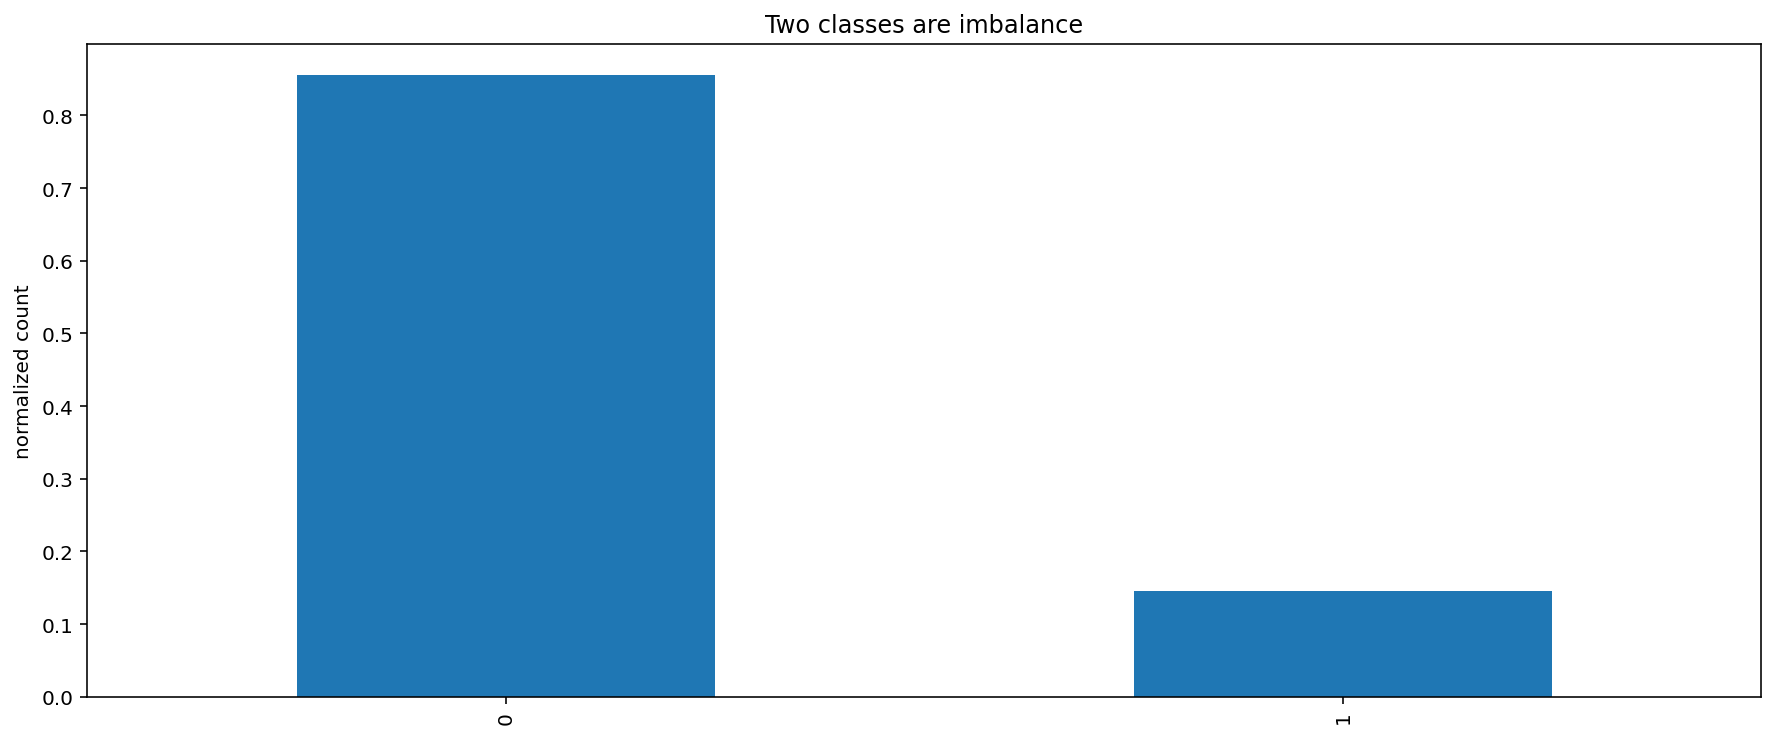

In [9]:
df['y'].value_counts(normalize=True).plot(kind='bar',figsize=(15,6))
plt.ylabel('normalized count')
plt.title('Two classes are imbalance')
plt.savefig("../Figures/plot_01_1_imbalancedata.png")

plt.show()

# Check out the object columns, number of uniques and number of NaNs

In [10]:
df_categ = df.select_dtypes(include=['object'])
print(df_categ.columns)
columns_obj_dtype = df_categ.columns

# print('columns_obj_dtype = ', columns_obj_dtype)

print(100*'=')


number_of_Obj_cols_with_nan = 0
columns_obj_dtype_NaN = []


for col in columns_obj_dtype:
    if df_categ[col].isnull().sum() != 0:
        number_of_Obj_cols_with_nan = number_of_Obj_cols_with_nan + 1
        
        columns_obj_dtype_NaN.append(col)
        
        print('NaNs % in ', col, '=', (df_categ[col].isnull().sum())*100/(df_categ.shape[0]), '%',
              '\nNumber of uniqs =', df_categ[col].nunique(), '\n')
print('number_of_Obj_cols_with_nan ', number_of_Obj_cols_with_nan)

Index(['x3', 'x7', 'x19', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77',
       'x93', 'x99'],
      dtype='object')
NaNs % in  x24 = 9.64 % 
Number of uniqs = 2 

NaNs % in  x33 = 17.9275 % 
Number of uniqs = 51 

NaNs % in  x77 = 23.1425 % 
Number of uniqs = 7 

NaNs % in  x99 = 32.09 % 
Number of uniqs = 1 

number_of_Obj_cols_with_nan  4


In [11]:
df_categ['target'] = df[['y']]

In [12]:
# target = 
# df_categ = df_categ.join(target)
df_categ.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99,target
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,1
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,1
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0


In [13]:
df_categ = df_categ.drop(['x7','x19'],axis=1)
df_categ.head()

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,target
0,Wed,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,1
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,1
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0


check out the unique values 

In [14]:
df_categ['x3'].unique()

array(['Wed', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Sat', 'Wednesday', 'Sun', 'Tue', 'Thur', 'Monday', 'Fri', 'Mon'],
      dtype=object)

In [15]:
for col in df_categ.columns:
    print(df_categ[col].unique(),'\n')

['Wed' 'Friday' 'Thursday' 'Tuesday' 'Sunday' 'Saturday' 'Sat' 'Wednesday'
 'Sun' 'Tue' 'Thur' 'Monday' 'Fri' 'Mon'] 

['female' 'male' nan] 

['no' 'yes'] 

['Colorado' 'Tennessee' 'Texas' 'Minnesota' 'New York' 'Florida'
 'Nebraska' 'California' nan 'North Dakota' 'Arizona' 'Alabama' 'Ohio'
 'Pennsylvania' 'Iowa' 'Indiana' 'Vermont' 'Arkansas' 'Massachusetts'
 'Illinois' 'Georgia' 'West Virginia' 'Connecticut' 'Virginia'
 'North Carolina' 'Montana' 'New Mexico' 'New Hampshire' 'Michigan' 'DC'
 'Washington' 'Louisiana' 'Kentucky' 'Utah' 'Missouri' 'Oregon' 'Oklahoma'
 'Nevada' 'Wisconsin' 'New Jersey' 'Maryland' 'Maine' 'Alaska' 'Idaho'
 'Wyoming' 'Rhode Island' 'South Dakota' 'Mississippi' 'Kansas' 'Delaware'
 'Hawaii' 'South Carolina'] 

['5-10 miles'] 

['August' 'April' 'September' 'January' 'December' 'March' 'July'
 'November' 'June' 'February' 'October' 'May'] 

['farmers' 'allstate' 'geico' 'progressive' 'esurance'] 

['mercedes' 'subaru' 'nissan' 'toyota' nan 'chevrolet' 'bui

In [16]:
# https://stackoverflow.com/questions/60237488/python-replace-only-exact-word-in-string
def fix_x3(df_categ):
    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSun\b', 'Sunday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSat\b', 'Saturday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bFri\b', 'Friday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bWed\b', 'Wednesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bMon\b', 'Monday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bThur\b', 'Thursday', string)

In [17]:
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bTue\b', 'Tuesday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bSun\b', 'Sunday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bSat\b', 'Saturday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bFri\b', 'Friday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bWed\b', 'Wednesday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bMon\b', 'Monday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bThur\b', 'Thursday', x))

In [18]:
df_categ['x3'].unique()

array(['Wednesday', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Monday'], dtype=object)

In [19]:
targets = df_categ['target']

In [20]:
df_categ.head(2)

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,target
0,Wednesday,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,1


In [21]:
for col in df_categ.columns:
    if df_categ[col].isnull().sum() != 0:
        print('column is ',col, 'number of nulls is ', df_categ[col].isnull().sum())
        df_categ[col].fillna(df_categ[col].mode()[0], inplace=True)
        print('column was ',col, 'number of nulls is ', df_categ[col].isnull().sum(),'\n')

column is  x24 number of nulls is  3856
column was  x24 number of nulls is  0 

column is  x33 number of nulls is  7171
column was  x33 number of nulls is  0 

column is  x77 number of nulls is  9257
column was  x77 number of nulls is  0 

column is  x99 number of nulls is  12836
column was  x99 number of nulls is  0 



group data and check out the differences

In [22]:
target_grp = df_categ.groupby(['target'])

# X3

In [23]:
target_grp['x3'].value_counts(normalize=True)

target  x3       
0       Tuesday      0.177442
        Wednesday    0.176039
        Monday       0.159605
        Friday       0.136679
        Saturday     0.132000
        Thursday     0.111121
        Sunday       0.107115
1       Wednesday    0.164225
        Friday       0.158711
        Monday       0.152680
        Saturday     0.149750
        Tuesday      0.136998
        Sunday       0.128382
        Thursday     0.109254
Name: x3, dtype: float64

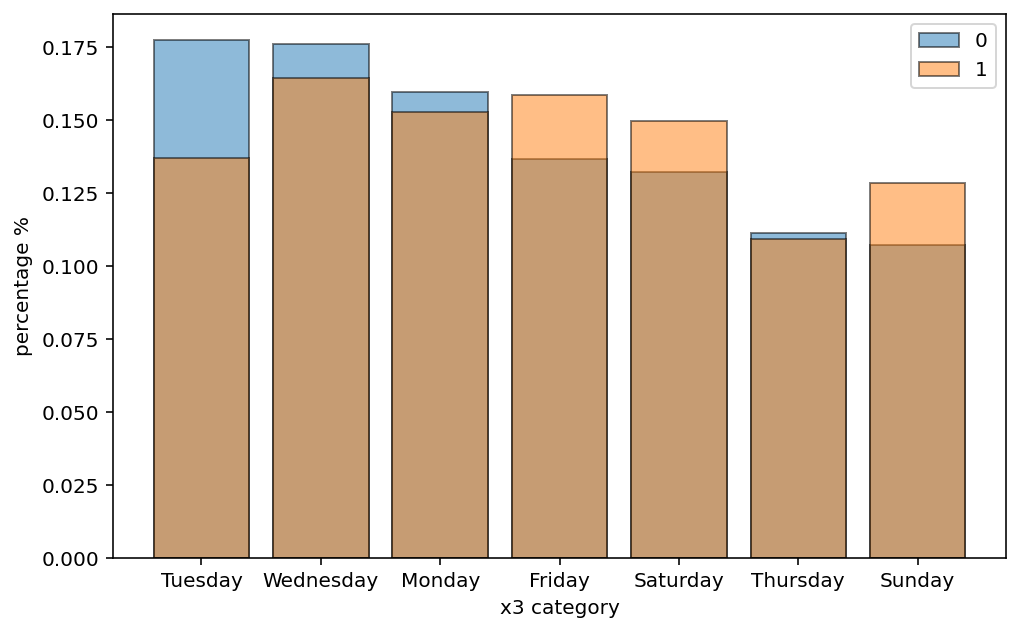

In [24]:
target_grp_x3_0 = target_grp['x3'].value_counts(normalize=True).loc[0]
target_grp_x3_1 = target_grp['x3'].value_counts(normalize=True).loc[1]


target_grp_x3_0_pd = pd.DataFrame(target_grp['x3'].value_counts(normalize=True).loc[0])
target_grp_x3_1_pd = pd.DataFrame(target_grp['x3'].value_counts(normalize=True).loc[1])

plt.figure(figsize=(8,5))
plt.bar(target_grp_x3_0_pd.index, 
        target_grp_x3_0_pd['x3'],
        alpha=0.5, ec='k', label='0')

plt.bar(target_grp_x3_1_pd.index, 
        target_grp_x3_1_pd['x3'],
        alpha=0.5, ec='k', label='1')

plt.xlabel('x3 category'); plt.ylabel('percentage %')
plt.legend()
plt.savefig("../Figures/plot_01_1_EDA_1.png")
plt.show()

clearly is seen that the days including Tuesday, wend, and Monday have more than 0 and in 3 days including Friday, Saturday, and Sunday the number of 1 are higher. make a bar function as follow and call it on column.

In [25]:
def plot_bars(df, col_name, fig_number, figsiz):
    

    target_grp_0 = target_grp[col_name].value_counts(normalize=True).loc[0]
    target_grp_1 = target_grp[col_name].value_counts(normalize=True).loc[1]


    target_grp_0_pd = pd.DataFrame(target_grp[col_name].value_counts(normalize=True).loc[0])
    target_grp_1_pd = pd.DataFrame(target_grp[col_name].value_counts(normalize=True).loc[1])

    plt.figure(figsize=figsiz)
    plt.bar(target_grp_0_pd.index, 
            target_grp_0_pd[col_name],
            alpha=0.5, ec='k', label='0')

    plt.bar(target_grp_1_pd.index, 
            target_grp_1_pd[col_name],
            alpha=0.5, ec='k', label='1')

    plt.xticks(rotation=65)
    plt.xlabel(col_name+ ' category'); plt.ylabel('percentage %')
    plt.legend()
    plt.savefig(f"../Figures/plot_01_1_EDA_{fig_number}.png")
    plt.show()

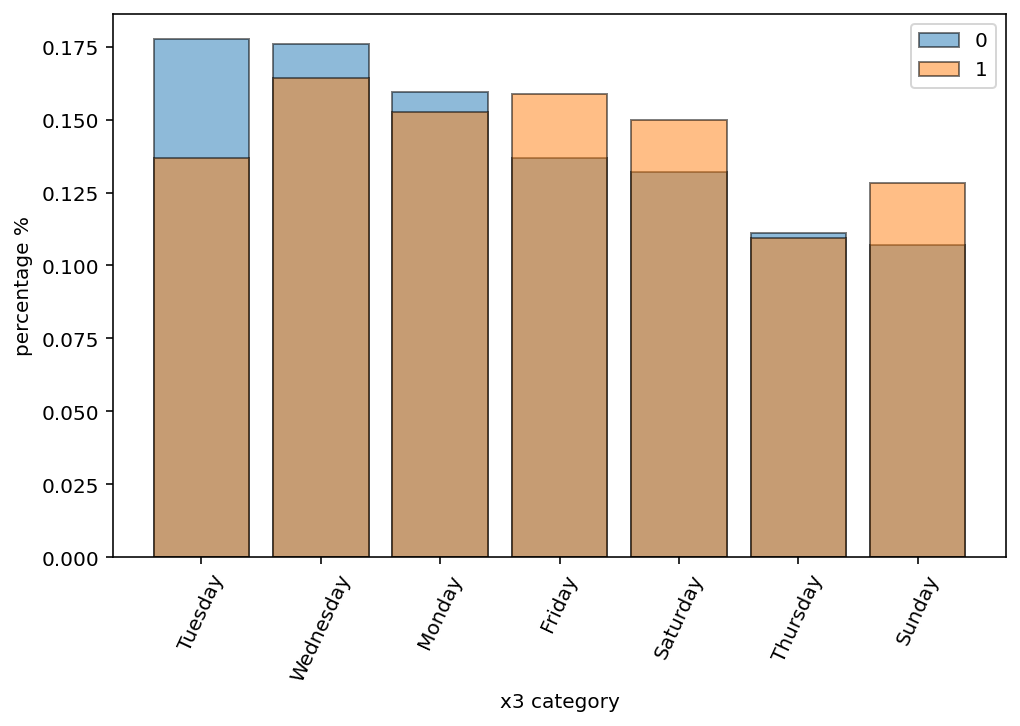

In [26]:
plot_bars(df_categ, col_name='x3', fig_number=1, figsiz=(8,5))

the first three days the chance of having 0 is higher. compare to the rest of the week that the chance of 1 is higher.

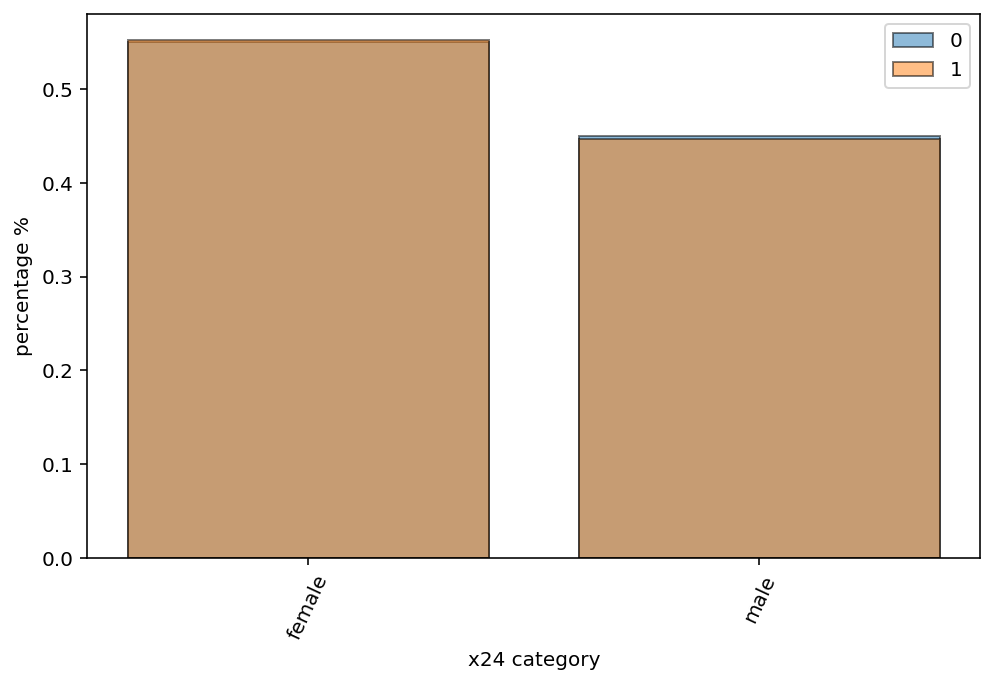

In [27]:
plot_bars(df_categ, col_name='x24', fig_number=2, figsiz=(8,5))

no difference between female and male is observed.

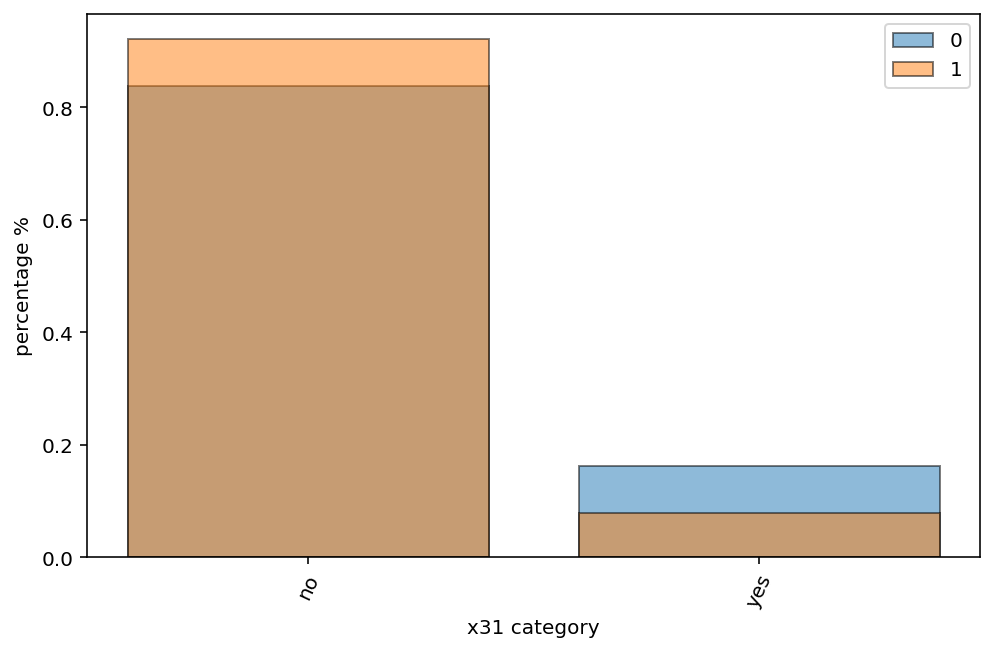

In [28]:
plot_bars(df_categ, col_name='x31', fig_number=3, figsiz=(8,5))

if the x31 value is no, it is higher chance for getting 1 as target. 

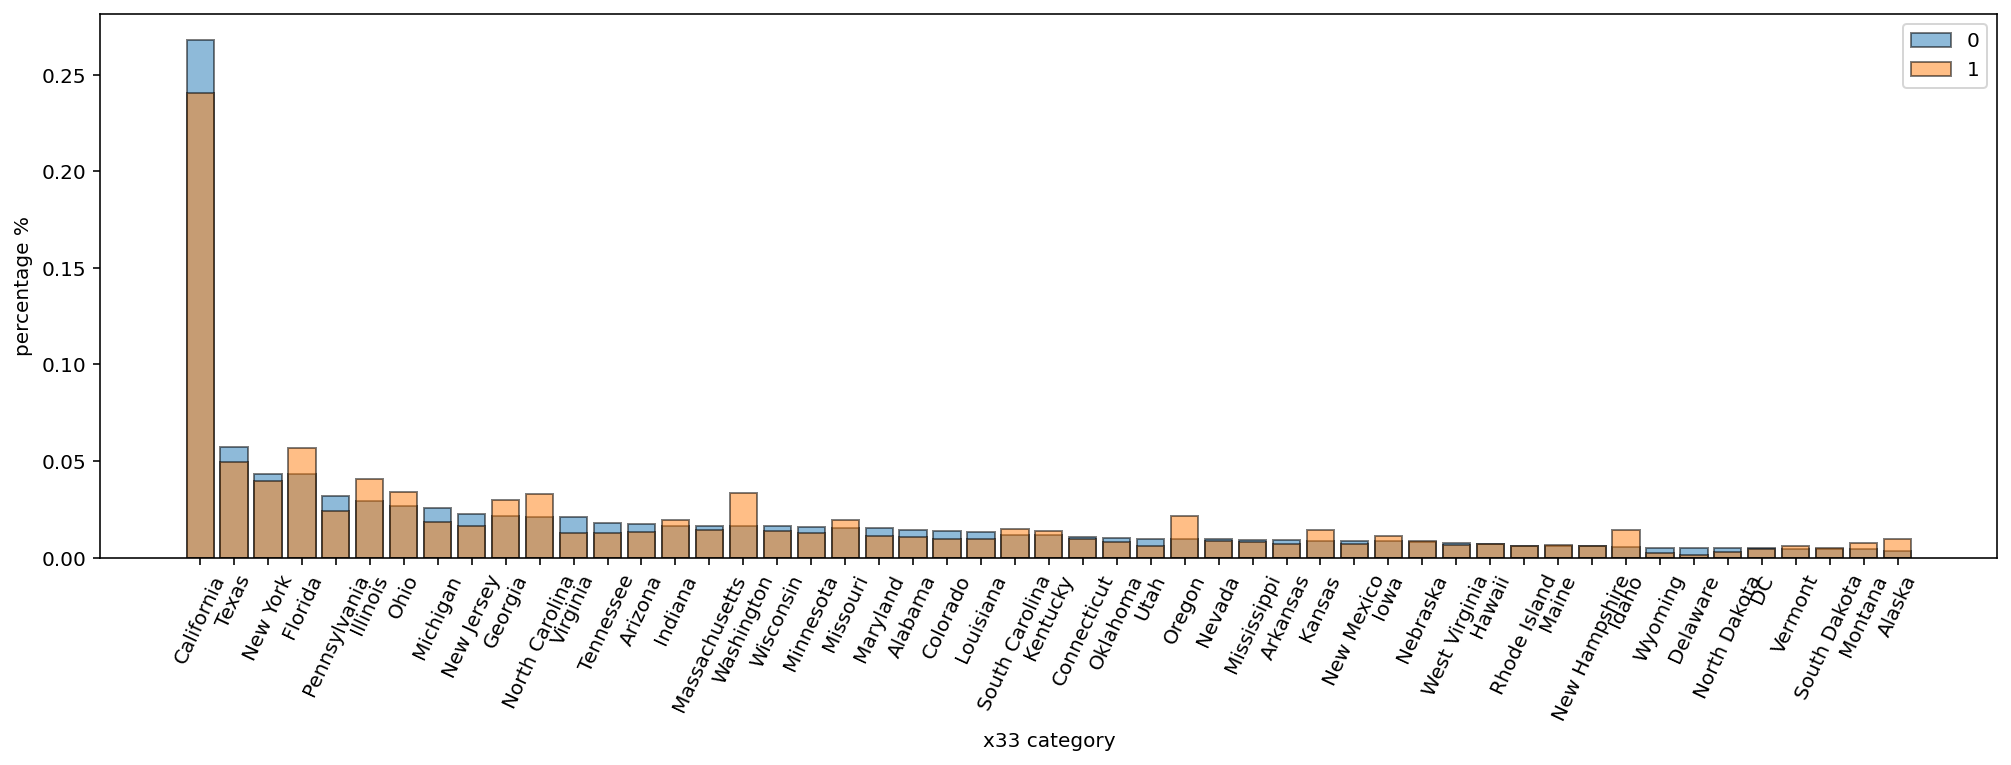

In [29]:
plot_bars(df_categ, col_name='x33', 
          fig_number=4, figsiz=(17,5))

california and texas have more 0 number compare to 1. so if x33 is texas, there is higher chance to get 0 as target value.

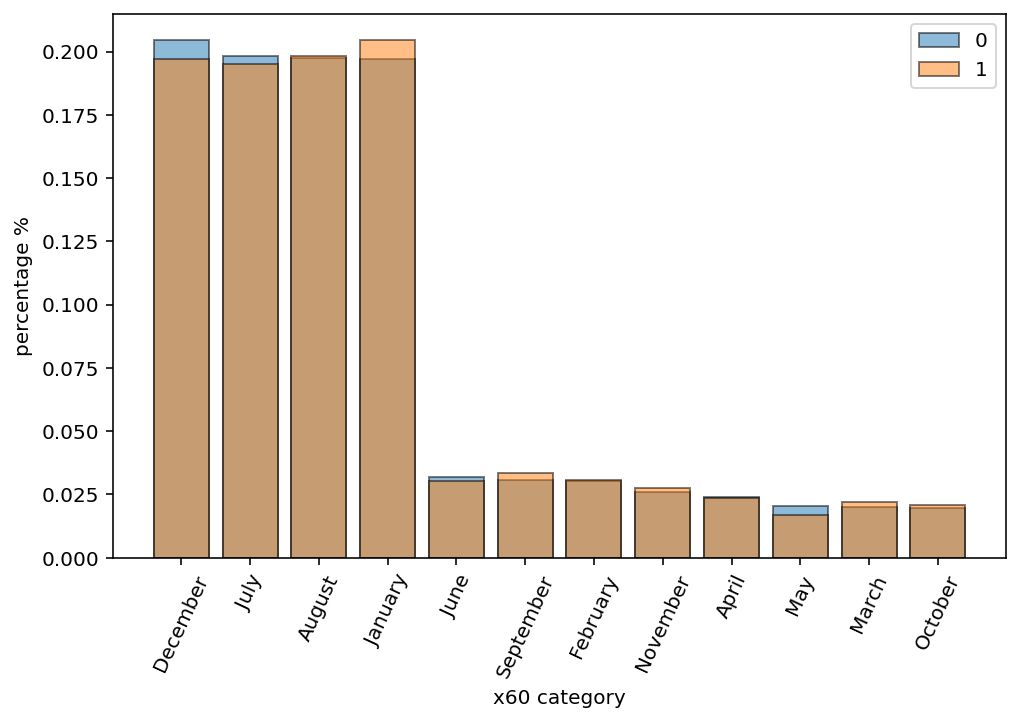

In [30]:
plot_bars(df_categ, col_name='x60', fig_number=5, figsiz=(8,5))

the chance for getting 0 as target is higher in december.

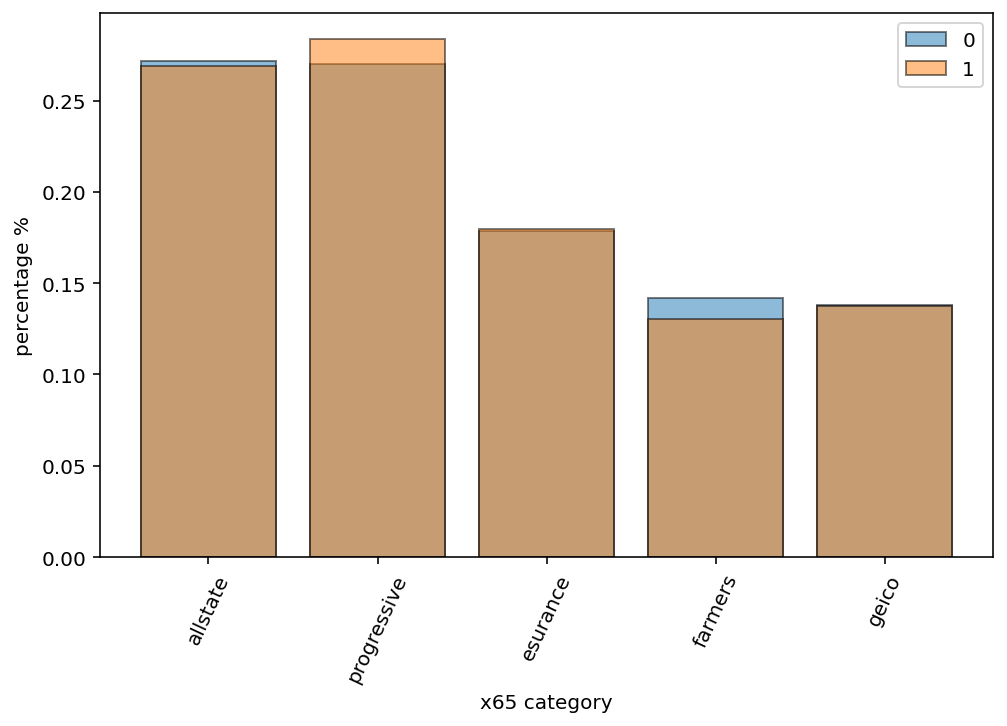

In [31]:
plot_bars(df_categ, col_name='x65', fig_number=6, figsiz=(8,5))

when the x65 category is farmers, the chance of getting 0 is higher. for the rest, I don't see any difference.

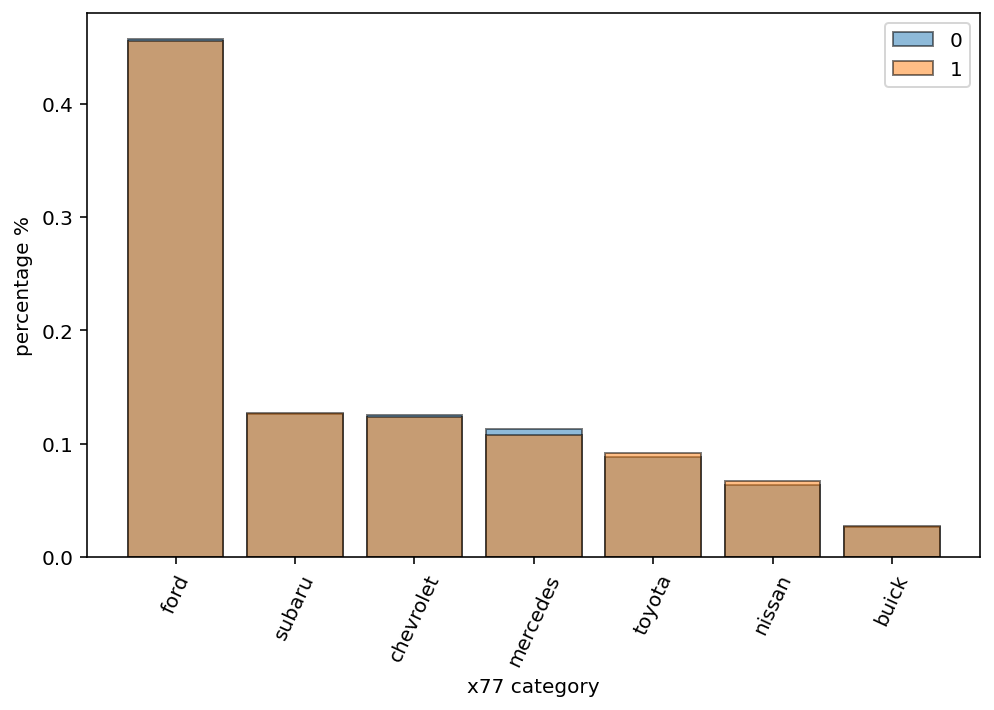

In [32]:
plot_bars(df_categ, col_name='x77', fig_number=6, figsiz=(8,5))

Mercedes has a slightly higher chance to get 0 as target value.

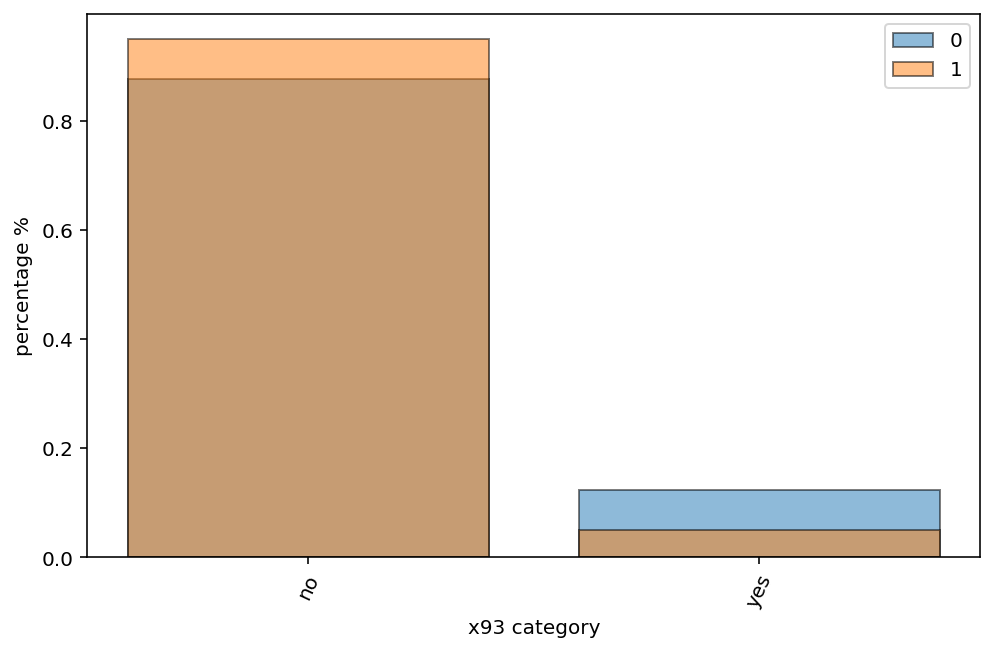

In [33]:
plot_bars(df_categ, col_name='x93', fig_number=6, figsiz=(8,5))

clearly there is difference between yes and no in column x93. 

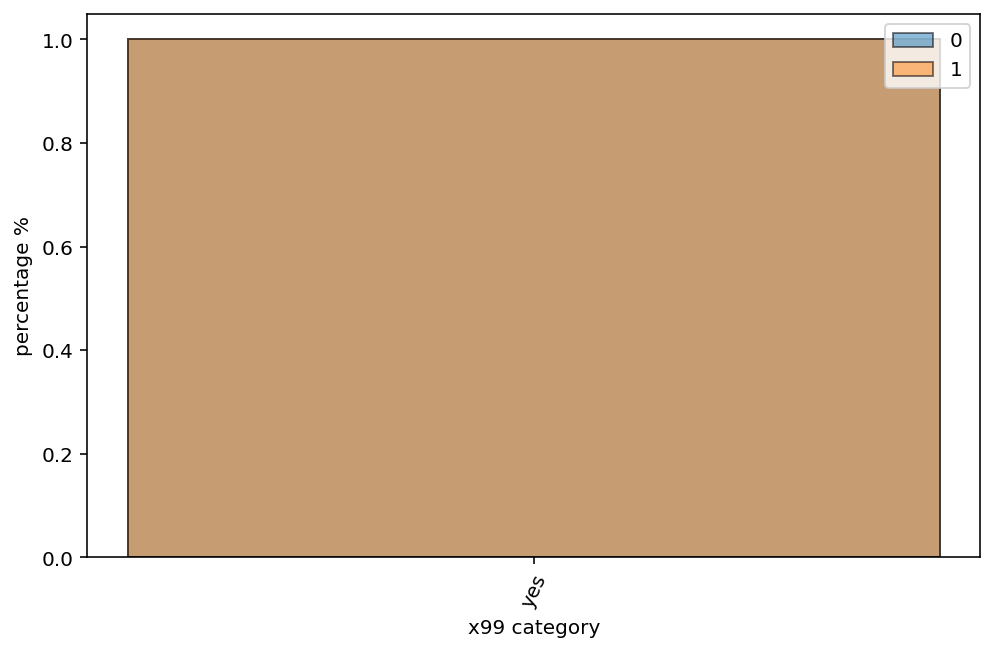

In [34]:
plot_bars(df_categ, col_name='x99', fig_number=6, figsiz=(8,5))

no difference is observed. this is a feature with 0 variance and should be dropped for final modeling.

i stop the EDA here and proceed into next steps